<a href="https://colab.research.google.com/github/lilchengzi/BA820-project/blob/main/BA820_Team_Project_Market%20Basket%20Analysis(Initial%20Approach).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing libraries and loading the dataset

In [ ]:
!pip install opendatasets

In [ ]:
#importing necessary libraries

import opendatasets as od
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
od.download(
    "https://www.kaggle.com/datasets/yasserh/instacart-online-grocery-basket-analysis-dataset")

Skipping, found downloaded files in "./instacart-online-grocery-basket-analysis-dataset" (use force=True to force download)


In [ ]:
# loading all dataframes

aisles = pd.read_csv('/content/instacart-online-grocery-basket-analysis-dataset/aisles.csv')
dept = pd.read_csv('/content/instacart-online-grocery-basket-analysis-dataset/departments.csv')
orders_prior = pd.read_csv('/content/instacart-online-grocery-basket-analysis-dataset/order_products__prior.csv')
orders = pd.read_csv('/content/instacart-online-grocery-basket-analysis-dataset/orders.csv')
prod = pd.read_csv('/content/instacart-online-grocery-basket-analysis-dataset/products.csv')

In [ ]:
orders_prior.shape

(32434489, 4)

Since this dataframe is too huge to work with, we will sample it to a smaller size moving forward.

In [ ]:
orders_prior1 = orders_prior.sample(frac=0.01, random_state=42)
orders_prior1

,order_id,product_id,add_to_cart_order,reordered
29481110,3109255,34099,16,0
2852353,301098,41950,5,0
11194500,1181866,45066,8,0
15909397,1678630,8859,2,1
6101870,644090,24781,2,0
...,...,...,...,...
13579781,1433375,34969,5,1
22168330,2338221,10248,10,0
4041427,426460,27676,7,0
4328233,456879,38028,2,1


In [ ]:
# joining them together on common keys

df1 = pd.merge(prod, aisles, how='inner', on='aisle_id')
df2 = df1.merge(dept, how='inner', on='department_id')
df3 = df2.merge(orders_prior1, how='inner', on='product_id')
df4 = df3.merge(orders, how='inner', on='order_id')

df4
df = df4.copy()
df

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,924888,11,1,177411,prior,72,5,1,4.0
1,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,268506,13,1,157915,prior,20,1,9,20.0
2,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,2109664,4,0,145504,prior,3,2,14,1.0
3,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,3209740,2,1,7981,prior,24,2,13,6.0
4,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1550174,1,1,66968,prior,15,3,16,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324340,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,1954609,7,0,130601,prior,14,5,13,9.0
324341,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,2323735,1,1,90235,prior,30,3,10,1.0
324342,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,878186,7,1,130467,prior,2,4,17,5.0
324343,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk dried fruits vegetables,bulk,2748395,1,0,96923,prior,4,4,10,2.0


##Exploring the dataset

In [ ]:
df.eval_set.unique()

array(['prior'], dtype=object)

In [ ]:
df = df.drop('eval_set', axis=1)

Dropping the eval_set column since it holds no relevance and is merely a label for orders with only one label present.

In [ ]:
df.isna().sum()

product_id                    0
product_name                  0
aisle_id                      0
department_id                 0
aisle                         0
department                    0
order_id                      0
add_to_cart_order             0
reordered                     0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    20775
dtype: int64

Null values are only observed in the 'days_since_prior_order' column. We shall explore this further now.

In [ ]:
df[df.days_since_prior_order.isnull()]

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
15,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes,snacks,2749907,21,0,63660,1,6,17,NaN
26,449,Chips Ahoy! Chewy Cookies,61,19,cookies cakes,snacks,2283973,22,0,152748,1,0,12,NaN
43,796,Chocolate Reese's Peanut Butter Cup Creme Oreo,61,19,cookies cakes,snacks,542105,2,0,112211,1,1,17,NaN
49,1648,Chocolate Chip 1.4 oz Packs Cookies,61,19,cookies cakes,snacks,2887816,23,0,168253,1,0,16,NaN
50,26283,White Corn,83,4,fresh vegetables,produce,2887816,27,0,168253,1,0,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324252,5161,Dried Mango,18,10,bulk dried fruits vegetables,bulk,1965398,2,0,50495,1,1,8,NaN
324253,5161,Dried Mango,18,10,bulk dried fruits vegetables,bulk,411935,1,0,61591,1,4,15,NaN
324268,5161,Dried Mango,18,10,bulk dried fruits vegetables,bulk,1924992,4,0,101510,1,6,8,NaN
324298,5161,Dried Mango,18,10,bulk dried fruits vegetables,bulk,2342697,15,0,171175,1,6,13,NaN


These null values might be suggesting that no prior purchase of the product was made by the customer. We can impute it with an arbitrary float value instead so that it is in line with the datatype of the column and holds value.

In [ ]:
# imputing a value to null values of days_since_prior_order so that those rows can be used for meaningful analysis

df['days_since_prior_order'].fillna(9999.0, inplace=True) # here 9999 is our arbitrary number
df['days_since_prior_order'].isna().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324345 entries, 0 to 324344
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   product_id              324345 non-null  int64  
 1   product_name            324345 non-null  object 
 2   aisle_id                324345 non-null  int64  
 3   department_id           324345 non-null  int64  
 4   aisle                   324345 non-null  object 
 5   department              324345 non-null  object 
 6   order_id                324345 non-null  int64  
 7   add_to_cart_order       324345 non-null  int64  
 8   reordered               324345 non-null  int64  
 9   user_id                 324345 non-null  int64  
 10  order_number            324345 non-null  int64  
 11  order_dow               324345 non-null  int64  
 12  order_hour_of_day       324345 non-null  int64  
 13  days_since_prior_order  324345 non-null  float64
dtypes: float64(1), int64

The data types seem relevant to their respective columns.

In [ ]:
df.describe()

,product_id,aisle_id,department_id,order_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,324345.000000,324345.000000,324345.000000,3.243450e+05,324345.000000,324345.000000,324345.000000,324345.000000,324345.000000,324345.000000,324345.000000
mean,25551.139194,71.198033,9.938035,1.710520e+06,8.376010,0.589536,102951.981295,17.144796,2.733216,13.428571,650.840648
std,14110.454313,38.222234,6.276621,9.869484e+05,7.158359,0.491919,59441.408028,17.502843,2.090947,4.251041,2445.515842
min,1.000000,1.000000,1.000000,4.300000e+01,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,13431.000000,31.000000,4.000000,8.559500e+05,3.000000,0.000000,51566.000000,5.000000,1.000000,10.000000,5.000000
50%,25167.000000,83.000000,9.000000,1.709853e+06,6.000000,1.000000,102527.000000,11.000000,3.000000,13.000000,8.000000
75%,37892.000000,107.000000,16.000000,2.561704e+06,11.000000,1.000000,154508.000000,24.000000,5.000000,16.000000,18.000000
max,49688.000000,134.000000,21.000000,3.421081e+06,110.000000,1.000000,206208.000000,99.000000,6.000000,23.000000,9999.000000


In [ ]:
df.describe(include='object')

,product_name,aisle,department
count,324345,324345,324345
unique,25415,134,21
top,Banana,fresh fruits,produce
freq,4754,36393,94761


Having a look at the summary statistics gives us a clearer picture of the dataset to perform further analysis.

In [ ]:
# converting day of the week (dow) of order from numerical to weekday name

# Define a mapping dictionary
dow_mapping = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

# Use the map function to apply the mapping
df['order_dow'] = df['order_dow'].map(dow_mapping)
df

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,924888,11,1,177411,72,Friday,1,4.0
1,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,268506,13,1,157915,20,Monday,9,20.0
2,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,2109664,4,0,145504,3,Tuesday,14,1.0
3,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,3209740,2,1,7981,24,Tuesday,13,6.0
4,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1550174,1,1,66968,15,Wednesday,16,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324340,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,1954609,7,0,130601,14,Friday,13,9.0
324341,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,2323735,1,1,90235,30,Wednesday,10,1.0
324342,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,878186,7,1,130467,2,Thursday,17,5.0
324343,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk dried fruits vegetables,bulk,2748395,1,0,96923,4,Thursday,10,2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324345 entries, 0 to 324344
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   product_id              324345 non-null  int64  
 1   product_name            324345 non-null  object 
 2   aisle_id                324345 non-null  int64  
 3   department_id           324345 non-null  int64  
 4   aisle                   324345 non-null  object 
 5   department              324345 non-null  object 
 6   order_id                324345 non-null  int64  
 7   add_to_cart_order       324345 non-null  int64  
 8   reordered               324345 non-null  int64  
 9   user_id                 324345 non-null  int64  
 10  order_number            324345 non-null  int64  
 11  order_dow               324345 non-null  object 
 12  order_hour_of_day       324345 non-null  int64  
 13  days_since_prior_order  324345 non-null  float64
dtypes: float64(1), int64

##EDA

Performing various exploratory data analyses to get to know the data better.

In [ ]:
# number of unique products in each aisle

df.groupby('aisle').product_id.nunique()

aisle
air fresheners candles           113
asian foods                      320
baby accessories                  12
baby bath body care               50
baby food formula                441
                                ... 
trash bags liners                 65
vitamins supplements             244
water seltzer sparkling water    239
white wines                       63
yogurt                           741
Name: product_id, Length: 134, dtype: int64

In [ ]:
# number of unique products in each departments

df.groupby('department').product_id.nunique()

department
alcohol             398
babies              586
bakery              973
beverages          2425
breakfast           682
bulk                 28
canned goods       1158
dairy eggs         2377
deli                809
dry goods pasta    1030
frozen             2413
household          1398
international       538
meat seafood        539
missing             252
other               166
pantry             2570
personal care      1984
pets                406
produce            1227
snacks             3456
Name: product_id, dtype: int64

In [ ]:
# order id with the biggest order

max_order = df.add_to_cart_order.max()
df[df.add_to_cart_order==max_order].loc[:,['order_id', 'user_id']]

,order_id,user_id
29349,3308010,129928


In [ ]:
# top customers based on purchase quantity

top_cust = df.groupby('user_id').order_id.count().reset_index()
top_cust.sort_values('order_id', ascending = False).head(10)

,user_id,order_id
115796,201268,44
79220,137629,43
80839,140440,37
62530,108187,37
104955,182401,36
41684,72136,35
19369,33731,33
101577,176478,32
94457,164055,32
58010,100330,31


###Further Analysis

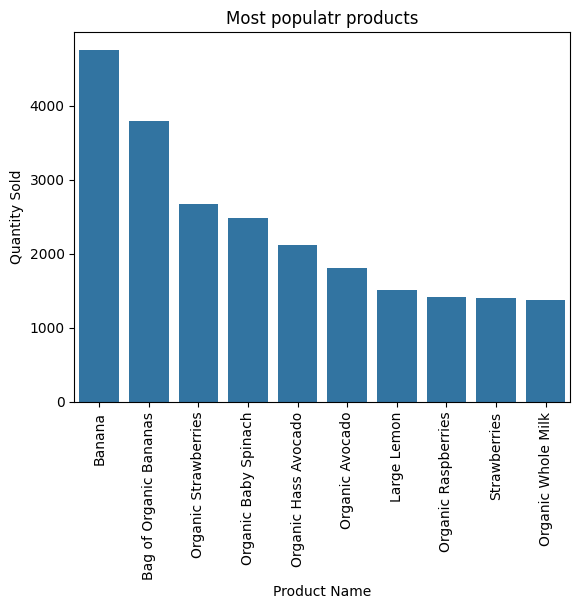

In [ ]:
# most popular products based on purchases

top_prod = df.product_name.value_counts().reset_index()
top_prod = top_prod.sort_values('product_name', ascending = False).head(10)

sns.barplot(data=top_prod, x='index', y='product_name')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.title('Most populatr products')
plt.xticks(rotation=90)
plt.show()

As seen in the visualization above, Bananas are the the most popular products sold at Instacart. It can also be seen that most of these top 10 products are organic products.

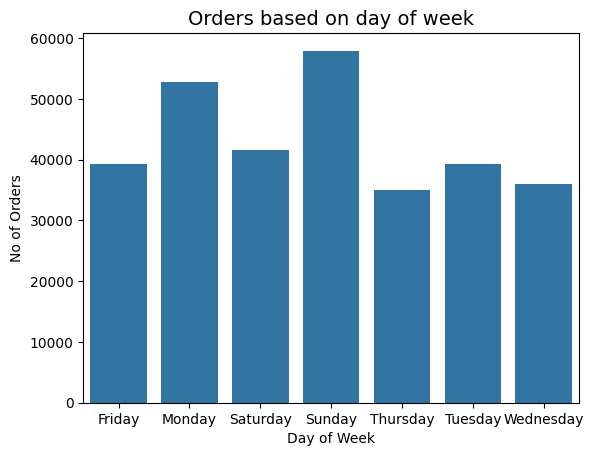

In [ ]:
# what day do most orders take place

dow = df.groupby('order_dow').order_id.nunique().reset_index()

sns.barplot(data=dow, x='order_dow', y='order_id');
plt.title('Orders based on day of week', fontsize = 14)
plt.xlabel('Day of Week')
plt.ylabel('No of Orders')
plt.show()

It can be observed from the illustration above that Sunday sees the maximum amount of orders, which could possibly be due to people shopping for groceries in the weekend.

In [ ]:
df

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,924888,11,1,177411,72,Friday,1,4.0
1,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,268506,13,1,157915,20,Monday,9,20.0
2,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,2109664,4,0,145504,3,Tuesday,14,1.0
3,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,3209740,2,1,7981,24,Tuesday,13,6.0
4,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1550174,1,1,66968,15,Wednesday,16,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324340,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,1954609,7,0,130601,14,Friday,13,9.0
324341,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,2323735,1,1,90235,30,Wednesday,10,1.0
324342,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,878186,7,1,130467,2,Thursday,17,5.0
324343,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk dried fruits vegetables,bulk,2748395,1,0,96923,4,Thursday,10,2.0


##Market Basket Analysis

In [ ]:
# importing necessary libraries

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
# combining items from same order together

df_mba = df.groupby('order_id')['product_name'].apply(','.join).reset_index()
df1 = df.drop('product_name', axis=1)
df_mba = df_mba.merge(df1, how='left', on='order_id')
df_mba

df_mba = df_mba.drop_duplicates(subset=['order_id'])
df_mba

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,product_name,product_id,aisle_id,department_id,aisle,department,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,43,Mozzarella Light Low Moisture Part Skim String...,20915,21,16,packaged cheese,dairy eggs,1,0,39630,14,Friday,17,4.0
1,61,0% Greek Strained Yogurt,38928,120,16,yogurt,dairy eggs,10,1,12295,2,Monday,9,7.0
2,66,Organic Lightly Salted Sea Salt Thin & Crispy ...,3397,107,19,chips pretzels,snacks,1,1,83434,15,Sunday,15,5.0
3,71,Organic Hass Avocado,47209,24,4,fresh fruits,produce,3,1,69984,20,Monday,13,11.0
4,74,Organic Chicken Bone Broth,14129,69,15,soup broth bouillon,canned goods,2,1,3321,31,Friday,21,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324340,3421048,Salt & Vinegar Potato Crisps,39023,107,19,chips pretzels,snacks,7,1,118494,19,Monday,15,7.0
324341,3421053,Whole Wheat Bread,13517,112,3,bread,bakery,4,1,32775,37,Saturday,13,7.0
324342,3421055,Organic Turmeric Pineapple Elixir,22350,31,7,refrigerated,beverages,6,1,42599,10,Saturday,20,30.0
324343,3421062,Organic Shredded Carrots,28289,123,4,packaged vegetables fruits,produce,6,1,33125,7,Sunday,14,19.0


In [ ]:
# data preparation
data_column = df_mba.loc[:, 'product_name']
data = list(data_column.apply(lambda x: x.split(',')))
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['Mozzarella Light Low Moisture Part Skim String Cheese'],
 ['0% Greek Strained Yogurt'],
 ['Organic Lightly Salted Sea Salt Thin & Crispy Restaurant Style Tortilla Chips'],
 ['Organic Hass Avocado'],
 ['Organic Chicken Bone Broth'],
 ['Sea Salt Pita Chips'],
 ['Apple & Cherry Fruit Bar'],
 ['85% Lean Ground Beef'],
 ['Organic Grade A Free Range Large Brown Eggs'],
 ['Green Bell Pepper'],
 ['Cage Free Brown Eggs-Large', ' Grade A'],
 ['Fancy Lump White', ' Crab Meat'],
 ['Golden Nugget Mandarin'],
 ['Combination Pizza Rolls'],
 ['Cage Free Brown Eggs-Large', ' Grade A'],
 ['Cheddar Cheese Burrito'],
 ['Lightly Salted Kettle Potato Chips - Sea Salt'],
 ['Organic Red Potatoes', 'Organic Basil'],
 ['Organic Thompson Seedless Raisins'],
 ['Squeeze Real Mayonnaise', 'Baby Food Pouch - Kale', ' Sweet Corn & Quinoa'],
 ['Cheesecloth'],
 ['Bread', ' Natural Fitness'],
 ['Organic Strawberries'],
 ['Low Fat Vanilla Yogurt', 'Cinnamon Raisin Bread'],
 ['Organic Baby Spinach'],
 ['Old Fashioned P

##Apriori Algorithm

In [ ]:
te = TransactionEncoder()
te_data = te.fit(data).transform(data)

# Create a dataframe from the data
df_encoded = pd.DataFrame(te_data, columns=te.columns_)
df_encoded

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,,Apricot & Banana Stage 2 Baby Food,Instant,Low Sodium Marinara,#2,& Baby Wipes,& Blueberry with Quinoa Organic Baby Food,& Cheese Biscuit,& Cheese Croissant,& Cheese English Muffin,...,with Crispy Almonds Cereal,with Dawn Action Pacs Fresh Scent Dishwasher Detergent Pacs,with Olive Oil Mayonnaise,with Olive Oil Mayonnaise Dressing,with Seasoned Roasted Potatoes Scrambled Eggs & Sausage,with Sweet Cinnamon Bunches Cereal,with Xylitol Island Berry Lime 18 Sticks Sugar Free Gum,with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum,Lightly Seasoned with Rosemary and Roasted Garlic Family Size Herb Chicken Tortellini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301927,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
301928,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
301929,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
301930,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
frequent_itemsets = apriori(df_encoded, min_support=0.001, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.001427,( Bag)
1,0.001563,( Bunch)
2,0.002650,( Organic)
3,0.001292,( Strawberry)
4,0.001010,( Vitamin D)
...,...,...
111,0.001076,(Vanilla Almond Breeze Almond Milk)
112,0.001057,(Whipped Cream Cheese)
113,0.001212,(Whole Milk)
114,0.002590,(Yellow Onions)


###Association Rules

In [ ]:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.001)
rules.sort_values(by="support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,( Bag),(Clementines),0.001427,0.002272,0.001268,0.888631,391.116855,0.001265,8.958766,0.998869
1,(Clementines),( Bag),0.002272,0.001427,0.001268,0.558309,391.116855,0.001265,2.260795,0.999715
